<a href="https://colab.research.google.com/github/Mamadyc/Pr-diction-des-couts-d-assurance-maladies/blob/main/TP_Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP Machine learning (- Entrainer le meilleur modèle pour prédire les deux variables suivantes : length of stay in hospital (days, numeric)
et  day_28_flg: death within 28 days (binary: 1 = yes, 0 = no))


# 1) DATA MANAGEMENT/PRETAITEMENT

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
# Chargement de la base de donnée
df = pd.read_csv("/content/data_tot.csv", sep=";")
df.describe()

,Unnamed: 0,aline_flg,hospital_los_day,gender_num,sapsi_first,sofa_first,service_num,day_icu_intime_num,hour_icu_intime,hosp_exp_flg,...,hr_1st,spo2_1st,abg_count,platelet_first,sodium_first,tco2_first,chloride_first,bun_first,po2_first,pco2_first
count,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,...,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000
mean,678.153935,0.649306,9.097222,0.578704,14.418981,6.143519,0.539352,4.039352,11.064815,0.146991,...,88.652778,98.302083,7.473380,244.089120,139.508102,24.296296,103.951389,18.943287,221.564815,42.930556
std,392.941087,0.477464,8.544196,0.494053,3.981174,2.217649,0.498738,1.999033,8.119785,0.354302,...,18.922230,6.122556,8.898383,99.159119,4.577382,5.077402,5.697467,13.302097,141.058301,13.180001
min,1.000000,0.000000,1.000000,0.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,30.000000,4.000000,0.000000,7.000000,118.000000,2.000000,80.000000,2.000000,22.000000,8.000000
25%,340.500000,0.000000,4.000000,0.000000,12.000000,5.000000,0.000000,2.000000,3.000000,0.000000,...,76.000000,98.000000,2.000000,177.000000,137.000000,22.000000,101.000000,11.000000,105.000000,36.000000
50%,663.500000,1.000000,7.000000,1.000000,14.000000,6.000000,1.000000,4.000000,10.000000,0.000000,...,88.000000,100.000000,4.000000,237.000000,140.000000,24.000000,104.000000,15.000000,191.000000,41.000000
75%,1006.250000,1.000000,11.000000,1.000000,17.000000,7.000000,1.000000,6.000000,19.000000,0.000000,...,101.000000,100.000000,9.000000,299.000000,142.000000,27.000000,107.000000,22.000000,304.250000,47.000000
max,1385.000000,1.000000,101.000000,1.000000,32.000000,16.000000,1.000000,7.000000,23.000000,1.000000,...,154.000000,100.000000,69.000000,900.000000,165.000000,49.000000,133.000000,126.000000,617.000000,151.000000


In [ ]:
## exploration des données
print(df)
print(df.info())

     Unnamed: 0  aline_flg icu_los_day  hospital_los_day       age  \
0             1          1        7,63                13  72,36841   
1             3          0        2,86                 5      36,5   
2             5          1        1,75                 5  23,74217   
3             7          1        7,06                27  24,64717   
4             9          1        3,79                 4  71,43198   
..          ...        ...         ...               ...       ...   
859        1376          1        4,93                10  53,96671   
860        1378          1        2,46                 8  44,06751   
861        1380          0        1,35                 3  35,57121   
862        1382          1        4,08                 7  76,81676   
863        1385          0        1,86                 3  48,38889   

     gender_num weight_first          bmi  sapsi_first  sofa_first  ...  \
0             1           75  29,91279129           15           9  ...   
1        

Présence des valeurs non numériques donc on va régrouper toutes les valeurs numériques

In [ ]:
# suppression des colonnes non numériques
df_numeric = df.select_dtypes(include=['number'])
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Unnamed: 0          864 non-null    int64
 1   aline_flg           864 non-null    int64
 2   hospital_los_day    864 non-null    int64
 3   gender_num          864 non-null    int64
 4   sapsi_first         864 non-null    int64
 5   sofa_first          864 non-null    int64
 6   service_num         864 non-null    int64
 7   day_icu_intime_num  864 non-null    int64
 8   hour_icu_intime     864 non-null    int64
 9   hosp_exp_flg        864 non-null    int64
 10  icu_exp_flg         864 non-null    int64
 11  day_28_flg          864 non-null    int64
 12  censor_flg          864 non-null    int64
 13  sepsis_flg          864 non-null    int64
 14  chf_flg             864 non-null    int64
 15  afib_flg            864 non-null    int64
 16  renal_flg           864 non-null    int64
 1

In [ ]:
#vérification si on a des valeurs manquantes
valeur_manquante= df_numeric.apply(lambda x: x.isnull().sum())

# le nombre de valeurs manquantes dans chaque colonne
print("Nombre de valeurs manquantes dans chaque colonne :")
print(valeur_manquante)

Nombre de valeurs manquantes dans chaque colonne :
Unnamed: 0            0
aline_flg             0
hospital_los_day      0
gender_num            0
sapsi_first           0
sofa_first            0
service_num           0
day_icu_intime_num    0
hour_icu_intime       0
hosp_exp_flg          0
icu_exp_flg           0
day_28_flg            0
censor_flg            0
sepsis_flg            0
chf_flg               0
afib_flg              0
renal_flg             0
liver_flg             0
copd_flg              0
cad_flg               0
stroke_flg            0
mal_flg               0
resp_flg              0
hr_1st                0
spo2_1st              0
abg_count             0
platelet_first        0
sodium_first          0
tco2_first            0
chloride_first        0
bun_first             0
po2_first             0
pco2_first            0
dtype: int64


on voit qu'on a pas de valeurs manquantes dans notre jeu de donnée

# 2)SEPARATION DES DONNEES/TEST D'ENTRAINEMENT


In [ ]:
# Séparation des variables prédictives (features) et de la variable cible (target)
X = df_numeric.drop(["hospital_los_day", "day_28_flg"], axis=1)
y_stay = df_numeric["hospital_los_day"]
y_death = df_numeric["day_28_flg"]

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_stay_train, y_stay_test, y_death_train, y_death_test = train_test_split(X, y_stay, y_death, test_size=0.2, random_state=42)

# Prétraitement des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Contenu des variables X et y
print("Shape of X:", X.shape)
print("Shape of y_stay:", y_stay.shape)
print("Shape of y_death:", y_death.shape)

# Contenu des données d'entraînement et de test
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_stay_train:", y_stay_train.shape)
print("Shape of y_stay_test:", y_stay_test.shape)
print("Shape of y_death_train:", y_death_train.shape)
print("Shape of y_death_test:", y_death_test.shape)

Shape of X: (864, 31)
Shape of y_stay: (864,)
Shape of y_death: (864,)
Shape of X_train: (691, 31)
Shape of X_test: (173, 31)
Shape of y_stay_train: (691,)
Shape of y_stay_test: (173,)
Shape of y_death_train: (691,)
Shape of y_death_test: (173,)


# 3-Construction et entraînement des modeles

In [ ]:

# Entraînement des modèles pour la durée de séjour
model_stay = RandomForestRegressor()
model_stay.fit(X_train_scaled, y_stay_train)

# Entraînement des modèles pour la prédiction du décès
model_death = RandomForestClassifier()
model_death.fit(X_train_scaled, y_death_train)

# Évaluation des modèles
stay_predictions = model_stay.predict(X_test_scaled)
stay_rmse = mean_squared_error(y_stay_test, stay_predictions)

death_predictions = model_death.predict(X_test_scaled)
death_accuracy = accuracy_score(y_death_test, death_predictions)

# 4) VISUALISATION/REPRESENTATION GRAPHIQUE

In [ ]:
# Courbes ROC pour le modèle de prédiction du décès
y_death_prob = model_death.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_death_test, y_death_prob)
roc_auc = auc(fpr, tpr)
# Matrice de confusion pour le modèle de prédiction du décès
conf_matrix = confusion_matrix(y_death_test, death_predictions)
# Affichage des performances
print("RMSE for length of stay prediction:", stay_rmse)
print("Accuracy for 28-day mortality prediction:", death_accuracy)

RMSE for length of stay prediction: 55.310869364161846
Accuracy for 28-day mortality prediction: 0.953757225433526


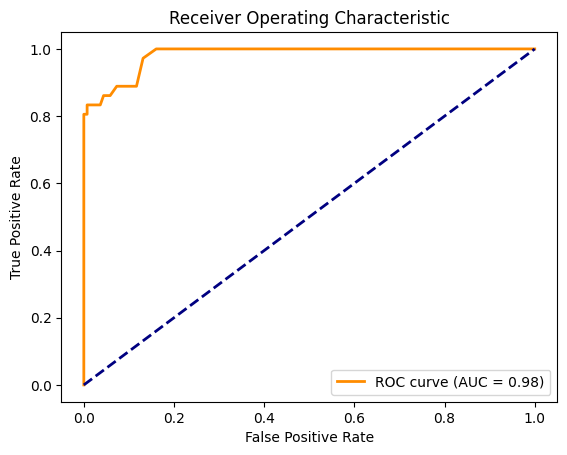

In [ ]:
# Affichage de la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

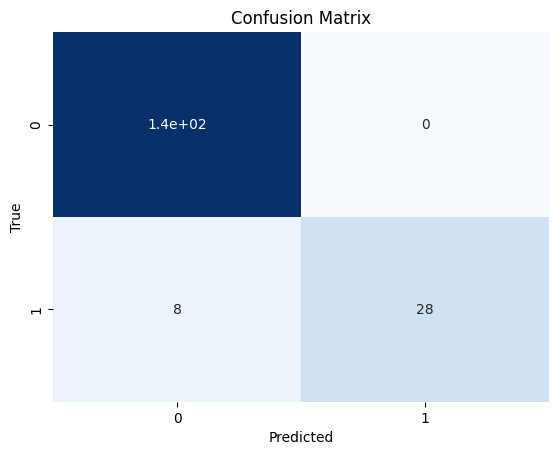

In [ ]:
# Affichage de la matrice de confusion
plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
